<a href="https://colab.research.google.com/github/RushnaFathima/Stroke-Prediction/blob/main/STROKE_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

2.DATA LOADING AND UNDERSTANDING

In [ ]:
stroke_data=pd.read_csv("/content/healthcare-dataset-stroke-data (1) (1).csv")

In [ ]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_data.shape

(5110, 12)

In [ ]:
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# convert age column datatype to integer
stroke_data["age"] = stroke_data["age"].astype(int)

In [ ]:
mean_bmi = stroke_data['bmi'].mean()
stroke_data['bmi'].fillna(mean_bmi, inplace=True)
#stroke_data.dropna(inplace=True)

/tmp/ipython-input-3290295801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['bmi'].fillna(mean_bmi, inplace=True)


In [ ]:
stroke_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
for i in stroke_data.columns:
  print(i)

id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


In [ ]:
for col in stroke_data.columns:
  numerical_features = ["id", "age", "bmi","avg_glucose_level"]
  if col not in numerical_features:
    print(col,":", stroke_data[col].unique(),"\n")

gender : ['Male' 'Female' 'Other'] 

hypertension : [0 1] 

heart_disease : [1 0] 

ever_married : ['Yes' 'No'] 

work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 

Residence_type : ['Urban' 'Rural'] 

smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 

stroke : [1 0] 



In [ ]:
stroke_data.drop(["id"],axis=1,inplace=True)

In [ ]:
stroke_data["stroke"].value_counts()

,count
stroke,
0,4861
1,249


Mean: 43.21526418786693
Median: 45.0


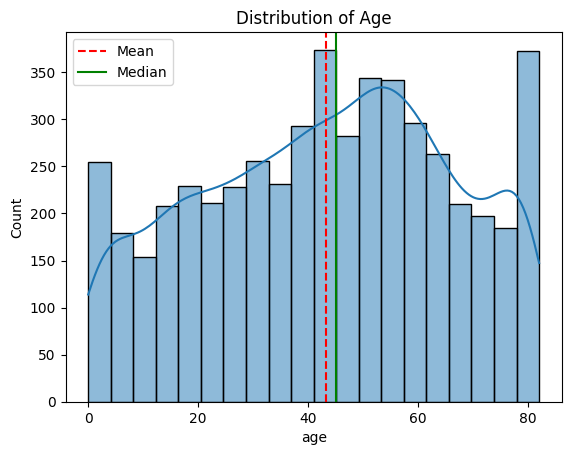

In [ ]:
# Histogram for "age"

sns.histplot(stroke_data["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = stroke_data["age"].mean()
age_median = stroke_data["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 28.893236911794663
Median: 28.4


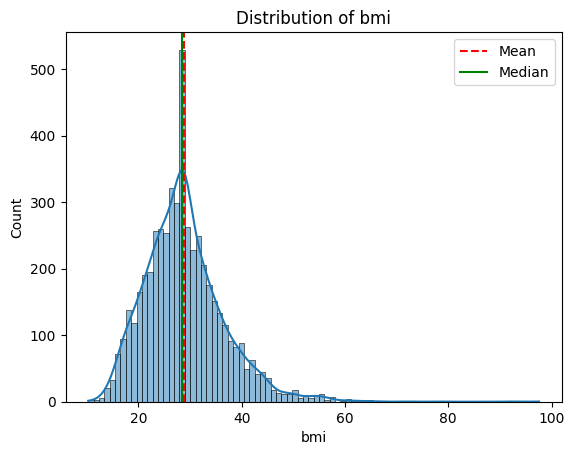

In [ ]:
# Histogram for "bmi"

sns.histplot(stroke_data["bmi"], kde=True)
plt.title("Distribution of bmi")

# calculate mean and median
bmi_mean = stroke_data["bmi"].mean()
bmi_median = stroke_data["bmi"].median()

print("Mean:", bmi_mean)
print("Median:", bmi_median)


# add vertical lines for mean and median
plt.axvline(bmi_mean, color="red", linestyle="--", label="Mean")
plt.axvline(bmi_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean: 106.1476771037182
Median: 91.88499999999999


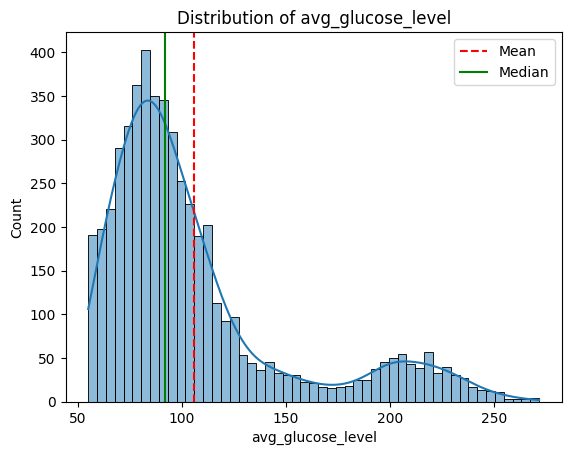

In [ ]:
# Histogram for "avg_glucose_level"

sns.histplot(stroke_data["avg_glucose_level"], kde=True)
plt.title("Distribution of avg_glucose_level")

# calculate mean and median
avg_glucose_level_mean = stroke_data["avg_glucose_level"].mean()
avg_glucose_level_median = stroke_data["avg_glucose_level"].median()

print("Mean:", avg_glucose_level_mean)
print("Median:", avg_glucose_level_median)


# add vertical lines for mean and median
plt.axvline(avg_glucose_level_mean, color="red", linestyle="--", label="Mean")
plt.axvline(avg_glucose_level_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

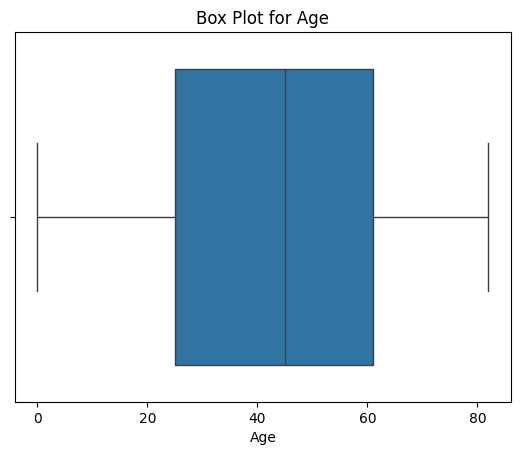

In [ ]:
# box plot
sns.boxplot(x=stroke_data["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

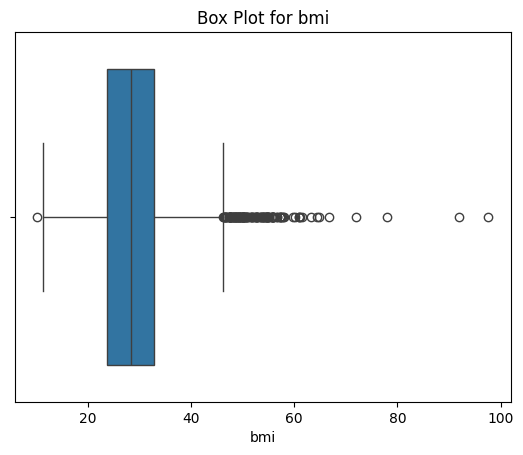

In [ ]:
# box plot
sns.boxplot(x=stroke_data["bmi"])
plt.title("Box Plot for bmi")
plt.xlabel("bmi")
plt.show()

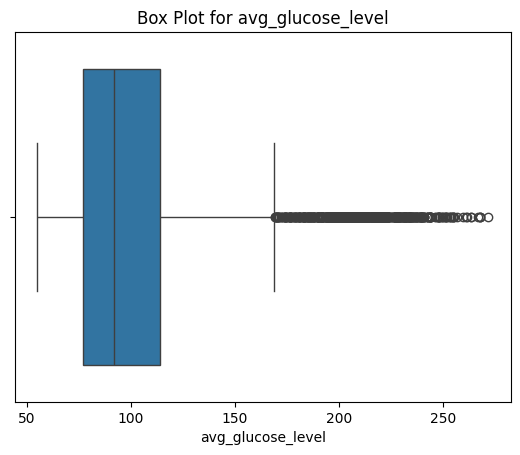

In [ ]:
# box plot
sns.boxplot(x=stroke_data["avg_glucose_level"])
plt.title("Box Plot for avg_glucose_level")
plt.xlabel("avg_glucose_level")
plt.show()

In [ ]:
# count the outliers using IQR method
numerical_features=[ "bmi","avg_glucose_level","age"]
for col in numerical_features:
  Q1 = stroke_data[col].quantile(0.25)
  Q3 = stroke_data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  f"{col}_outliers"== stroke_data[(stroke_data[col] < lower_bound) | (stroke_data[col] > upper_bound)]
  print(f"{col}_outliers_count=",len(f"{col}_outliers"))



bmi_outliers_count= 12
avg_glucose_level_outliers_count= 26
age_outliers_count= 12


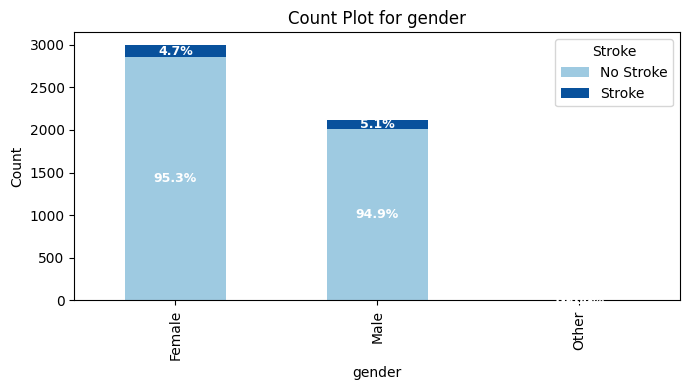

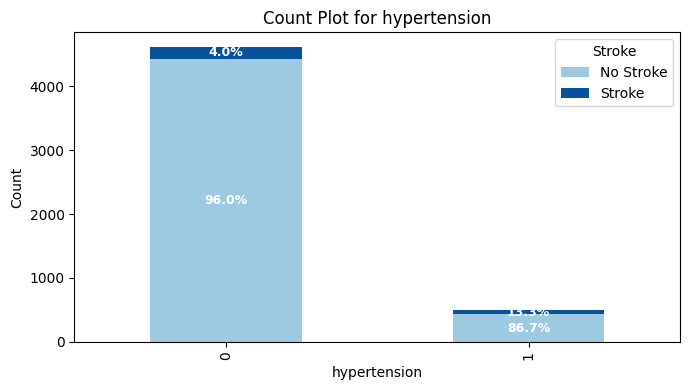

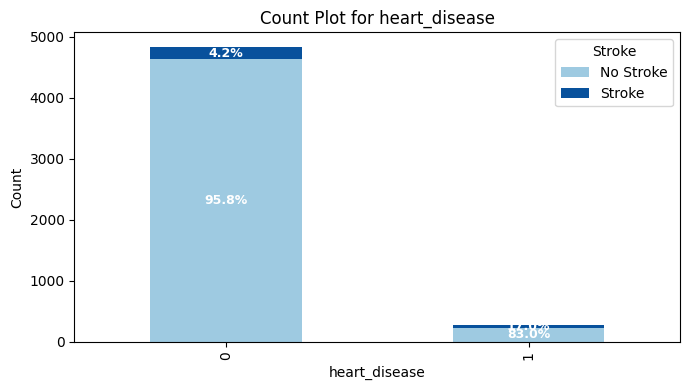

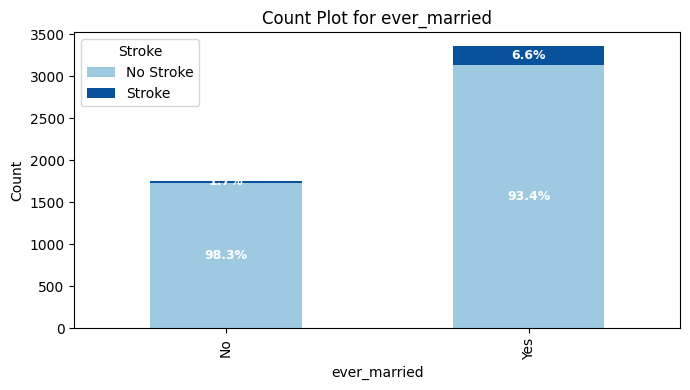

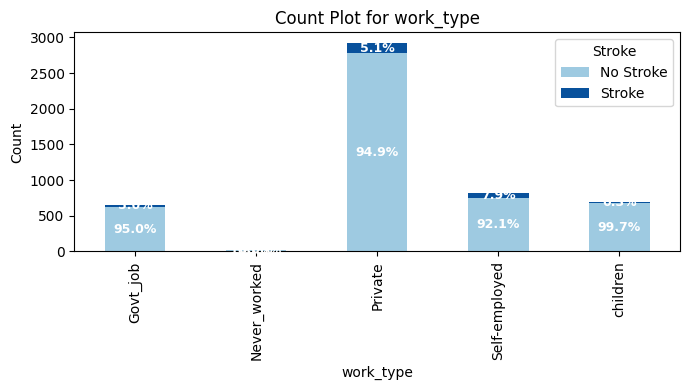

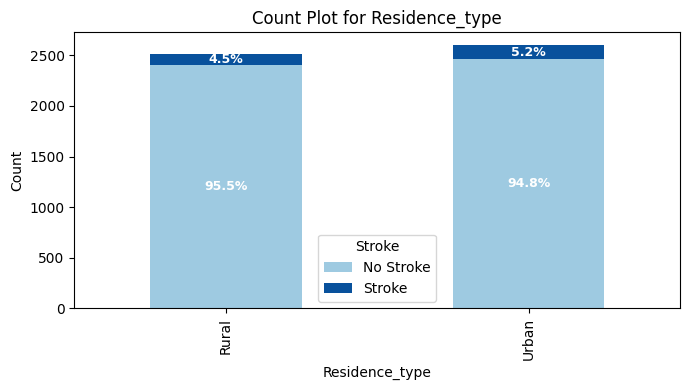

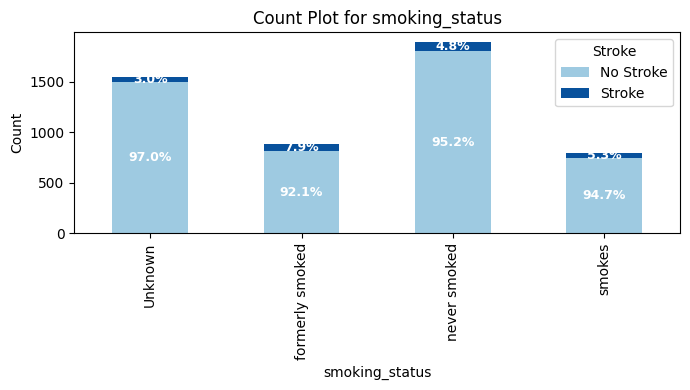

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define numeric columns (we'll skip these)
numerical_features = ["id", "age", "bmi", "avg_glucose_level"]

# Loop through all categorical columns
for col in stroke_data.columns:
    if col not in numerical_features and col != "stroke":

        # Count stroke and non-stroke per category
        count_df = stroke_data.groupby(col)["stroke"].value_counts().unstack(fill_value=0)

        # Plot stacked bars (blue shades)
        ax = count_df.plot(
            kind="bar",
            stacked=True,
            color=["#9ecae1", "#08519c"],  # light blue & dark blue
            figsize=(7, 4)
        )

        # Titles and labels
        plt.title(f"Count Plot for {col}", fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel("Count", fontsize=10)
        plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])

        # Add percentage labels inside bars
        for i, (index, row) in enumerate(count_df.iterrows()):
            total = row.sum()
            bottom = 0
            for j, val in enumerate(row):
                percentage = val / total * 100 if total > 0 else 0
                ax.text(
                    i,
                    bottom + val / 2,
                    f"{percentage:.1f}%",
                    ha="center",
                    va="center",
                    color="white",
                    fontsize=9,
                    fontweight="bold"
                )
                bottom += val

        plt.tight_layout()
        plt.show(
        )

In [ ]:
#data splitting to dependent and independent variables
X=stroke_data.drop(["stroke"],axis=1)#independent
y=stroke_data["stroke"]#dependent

In [ ]:
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [ ]:
y.head(5)

,stroke
0,1
1,1
2,1
3,1
4,1


In [ ]:
X.dtypes

,0
gender,object
age,int64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
#one-hot encoding
X_encoded = pd.get_dummies(X,columns=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status'],dtype=int)

In [ ]:
X_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
X_encoded.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
import joblib
expected_cols = X_encoded.columns.tolist()
joblib.dump(expected_cols, "model_columns.pkl")

['model_columns.pkl']

In [ ]:
sum(y)/len(y)

0.0487279843444227

So we see that 4.857% of people in the dataset have stroke.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
sum(y_train)/len(y_train)

0.048644115180318706

In [ ]:
sum(y_test)/len(y_test)

0.04892367906066536

# **MODEL TRAINING AND EVALUATION**

**XGBoost**


RandomizedSearchCV

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.09),
    'subsample': stats.uniform(0.5, 0.5),
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': stats.uniform(0, 5),
    'min_child_weight': stats.randint(1, 10),
    'n_estimators': stats.randint(50, 200),
    'reg_lambda': stats.uniform(0, 10),        # L2 regularization
    'scale_pos_weight': stats.uniform(1, 10)   # imbalance handling
}
# Create the XGBoost model object
xgb_model  = xgb.XGBClassifier(
    eval_metric="aucpr",   # use PR-AUC for imbalance
    random_state=42
)


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='recall',
    n_jobs=10,
    random_state=42,
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': np.float64(0.847987103046849), 'gamma': np.float64(2.044764722071349), 'learning_rate': np.float64(0.02559648880637612), 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 145, 'reg_lambda': np.float64(5.4922666470612045), 'scale_pos_weight': np.float64(8.145959227000624), 'subsample': np.float64(0.8300986883588657)}
Best score:  0.5105882352941176


In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constr...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3ef4b20b60>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4b20b90>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4b20b30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4d3deb0>},
                   random_state=42, scoring='recall')

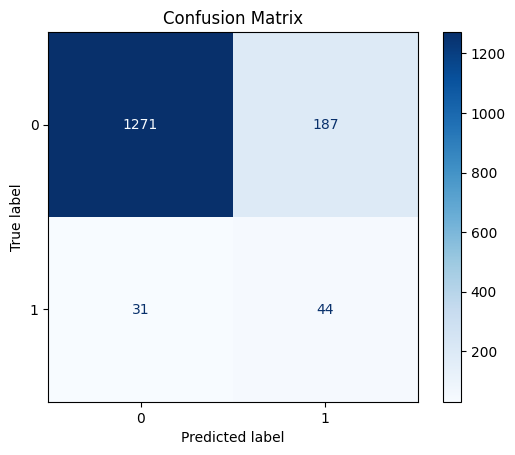

In [ ]:
model_rs = random_search.best_estimator_

# Predict on the test set (replace with your X_test, y_test)
y_pred_xgb = model_rs .predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=model_rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_xgb)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_xgb)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_xgb)
print(f"F1 Score: {f1:.4f}")

# AUC Score
auc = roc_auc_score(y_test, y_pred_xgb)
print(f"AUC Score: {auc:.4f}")


Accuracy: 0.8578
Precision: 0.1905
Recall: 0.5867
F1 Score: 0.2876
AUC Score: 0.7292


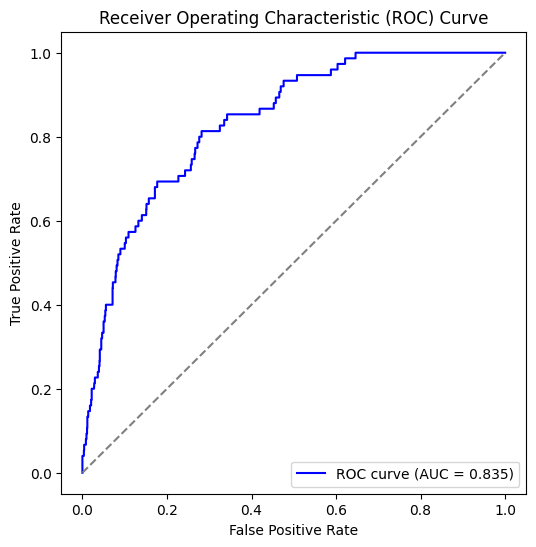

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Use best model from RandomizedSearchCV
model_rs = random_search.best_estimator_

# Get predicted probabilities (for the positive class)
y_proba = model_rs.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: stroke
0    3403
1     174
Name: count, dtype: int64
Class distribution after resampling: stroke
0    3403
1    3403
Name: count, dtype: int64


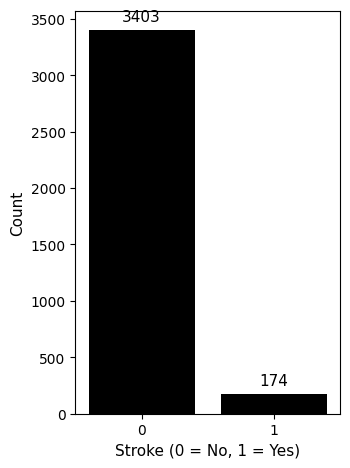

In [ ]:
plt.subplot(1, 2, 2)
ax = sns.countplot(x=y_train, color="black")
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Add black count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,   # X position (center of bar)
        height + 50,                      # Y position (slightly above bar)
        f'{int(height)}',                 # Text label
        ha='center', va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()


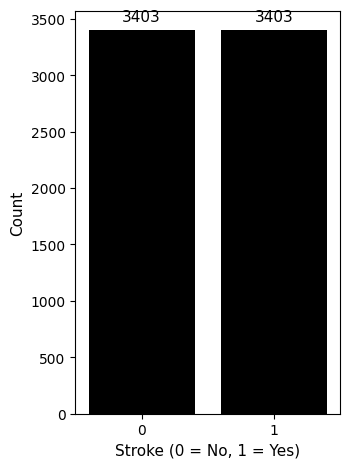

In [ ]:
plt.subplot(1, 2, 2)
ax = sns.countplot(x=y_train_res, color="black")
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=11)
plt.ylabel('Count', fontsize=11)

# Add black count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,   # X position (center of bar)
        height + 50,                      # Y position (slightly above bar)
        f'{int(height)}',                 # Text label
        ha='center', va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()



In [ ]:
random_search.fit(X_train_res, y_train_res)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'colsample_bytree': np.float64(0.5202167947692157), 'gamma': np.float64(3.553314448428937), 'learning_rate': np.float64(0.01998017387306482), 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 112, 'reg_lambda': np.float64(8.957635956735194), 'scale_pos_weight': np.float64(5.7537022318211175), 'subsample': np.float64(0.7816377859881918)}
Best score:  0.9970627105467738


In [ ]:
random_search.fit(X_train_res, y_train_res)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constr...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a3ef4b20b60>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4b20b90>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4b20b30>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a3ef4d3deb0>},
                   random_state=42, scoring='recall')

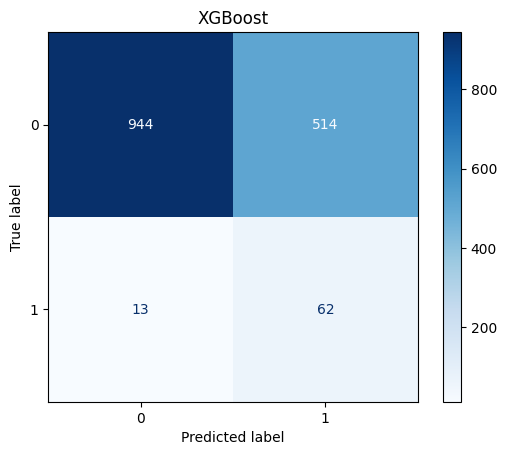

In [ ]:
# Use the best estimator from RandomizedSearchCV
model_rs_smote = random_search.best_estimator_

# Predict on the test set (replace with your X_test, y_test)
y_pred_xgb_s = model_rs_smote.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_s, labels=model_rs_smote.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rs_smote.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost")
plt.grid(False)
plt.show()

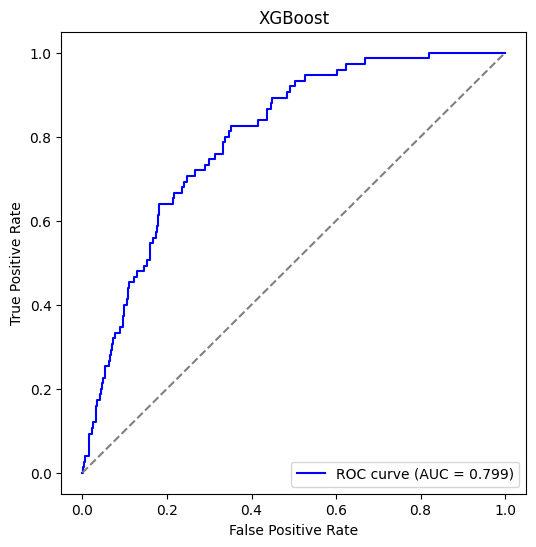

In [ ]:
y_proba = model_rs_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb_s)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_xgb_s)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_xgb_s)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_xgb_s)
print(f"F1 Score: {f1:.4f}")

# AUC Score
auc = roc_auc_score(y_test, y_pred_xgb_s)
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.6562
Precision: 0.1076
Recall: 0.8267
F1 Score: 0.1905
AUC Score: 0.7371


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print("Accuracy score:", accuracy_score(y_test, y_pred_xgb_s))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_s))

Accuracy score:
 0.6562296151337247
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78      1458
           1       0.11      0.83      0.19        75

    accuracy                           0.66      1533
   macro avg       0.55      0.74      0.49      1533
weighted avg       0.94      0.66      0.75      1533



In [ ]:
from imblearn.combine import SMOTETomek
import collections
smt = SMOTETomek(random_state=42)
X_res_st, y_res_st = smt.fit_resample(X_train, y_train)
print("Resampled dataset shape:", collections.Counter(y_res_st))

In [ ]:
random_search.fit(X_res_st, y_res_st)
# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

In [ ]:

model_rs_s = random_search.best_estimator_
y_pred_s = model_rs_s.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_s, labels=model_rs_s.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rs_s.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost")
plt.grid(False)
plt.show()
print("Accuracy score:\n", accuracy_score(y_test, y_pred_s))
print("Classification Report:\n", classification_report(y_test, y_pred_s))

In [ ]:
importances = model_rs_s.feature_importances_
features = X_encoded.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance - Random Forest")
plt.show()

In [ ]:
import joblib

joblib.dump(model_rs_st, "xgb_stroke_model.pkl")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

In [ ]:
cv_scores

In [ ]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

**DECISION TREE**

In [ ]:
from scipy.stats import randint
from sklearn.metrics import accuracy_score
# ----------------- Decision Tree -----------------
param_dist_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None] + list(range(5, 71)),   # None + depths 5 → 70
    "min_samples_split": randint(2, 21),        # integers from 2 → 20
    "min_samples_leaf": randint(1, 9)           # integers from 1 → 8
}
random_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=20,         # number of random combos to try
    cv=5,
    scoring="recall",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [ ]:
random_dt.fit(X_train_res, y_train_res)

In [ ]:
#balanced data
print("Best Decision Tree Params:", random_dt.best_params_)
print("Best CV Accuracy:", random_dt.best_score_)

y_pred_dt = random_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree")
plt.grid(False)
plt.show()
print("Accuracy score:\n", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_dt)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_dt)
print(f"F1 Score: {f1:.4f}")

# AUC Score
auc = roc_auc_score(y_test, y_pred_dt)
print(f"AUC Score: {auc:.4f}")

**RANDOM FOREST**

In [ ]:
# ----------------- Random Forest -----------------

param_dist_rf = {
    "n_estimators": randint(50, 500),        # random integers between 50 and 500
    "max_depth": randint(5, 50),             # random integers between 5 and 50
    "min_samples_split": randint(2, 20),     # random integers between 2 and 20
    "min_samples_leaf": randint(1, 10),      # random integers between 1 and 10
    "bootstrap": [True, False]               # categorical, so still a list
}

random_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=30,         # number of random combos to try
    cv=5,
    scoring="recall",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_rf.fit(X_train_res, y_train_res)

In [ ]:
print("Best Random Forest Params:", random_rf.best_params_)
print("Best CV Accuracy:", random_rf.best_score_)

y_pred_rf = random_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.grid(False)
plt.show()
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
y_proba = random_dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_proba = random_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1:.4f}")

# AUC Score
auc = roc_auc_score(y_test, y_pred_rf)
print(f"AUC Score: {auc:.4f}")